# MSc. Dissertation - DataScience
## BACKGROUND:   
### Analysis of Remote Work Impact on Employee Well-Being (Cleaned Secondary Dataset)

In [71]:
# Importing necessary libraries here below:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [72]:
# Loading in the cleaned dataset
wfh_mentalHealth_data = pd.read_csv('../Secondary_Research/SR_Dataset/cleaned_Remote_Work_on_Mental_Health.csv')

In [73]:
wfh_mentalHealth_data

,Employee_ID,Age,Gender,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,...,Industry_Healthcare,Industry_IT,Industry_Manufacturing,Industry_Retail,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Work_Stress_Score
0,EMP0002,40,1.0,3,1,52,4,1,2,0,...,False,True,False,False,True,False,False,False,False,55
1,EMP0010,30,1.0,28,2,57,6,1,1,1,...,False,True,False,False,False,False,True,False,False,62
2,EMP0013,40,1.0,1,1,21,7,2,3,1,...,False,False,False,False,False,True,False,False,False,26
3,EMP0016,56,1.0,13,1,44,11,4,1,0,...,True,False,False,False,False,False,False,False,False,51
4,EMP0020,59,0.0,13,1,59,4,3,2,0,...,False,False,False,False,False,False,False,False,True,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,EMP4980,26,0.0,26,2,34,10,5,2,1,...,False,False,False,True,False,False,False,False,False,39
1301,EMP4982,57,0.0,17,3,58,15,2,2,1,...,False,False,False,False,False,False,False,True,False,71
1302,EMP4992,60,1.0,9,2,57,4,2,1,1,...,False,True,False,False,False,False,False,True,False,59
1303,EMP4996,32,0.0,4,3,24,2,5,3,1,...,False,False,False,False,True,False,False,False,False,21


### 2.1 Computing Correlation Matrix:

In [75]:
#Selecting only numeric columns (int)
numeric_only_df = wfh_mentalHealth_data.select_dtypes(include=['number'])

In [76]:
# Computing correlation matrix
correlation_matrix = numeric_only_df.corr()

In [77]:
# Displaying the result
print(correlation_matrix)

                                        Age    Gender  Years_of_Experience  \
Age                                1.000000 -0.022518            -0.004148   
Gender                            -0.022518  1.000000             0.012084   
Years_of_Experience               -0.004148  0.012084             1.000000   
Work_Location                     -0.004790 -0.048112            -0.002277   
Hours_Worked_Per_Week             -0.003125 -0.062223            -0.018181   
Number_of_Virtual_Meetings        -0.014960  0.000515             0.024556   
Work_Life_Balance_Rating           0.001685  0.031515             0.010466   
Stress_Level                      -0.017523  0.009709            -0.011510   
Access_to_Mental_Health_Resources -0.010296 -0.032068             0.055036   
Social_Isolation_Rating           -0.024543  0.016612            -0.000756   
Satisfaction_with_Remote_Work      0.022530  0.002680             0.054097   
Company_Support_for_Remote_Work    0.025452 -0.000895           

### 2.1.1 Constructing Heatmap:

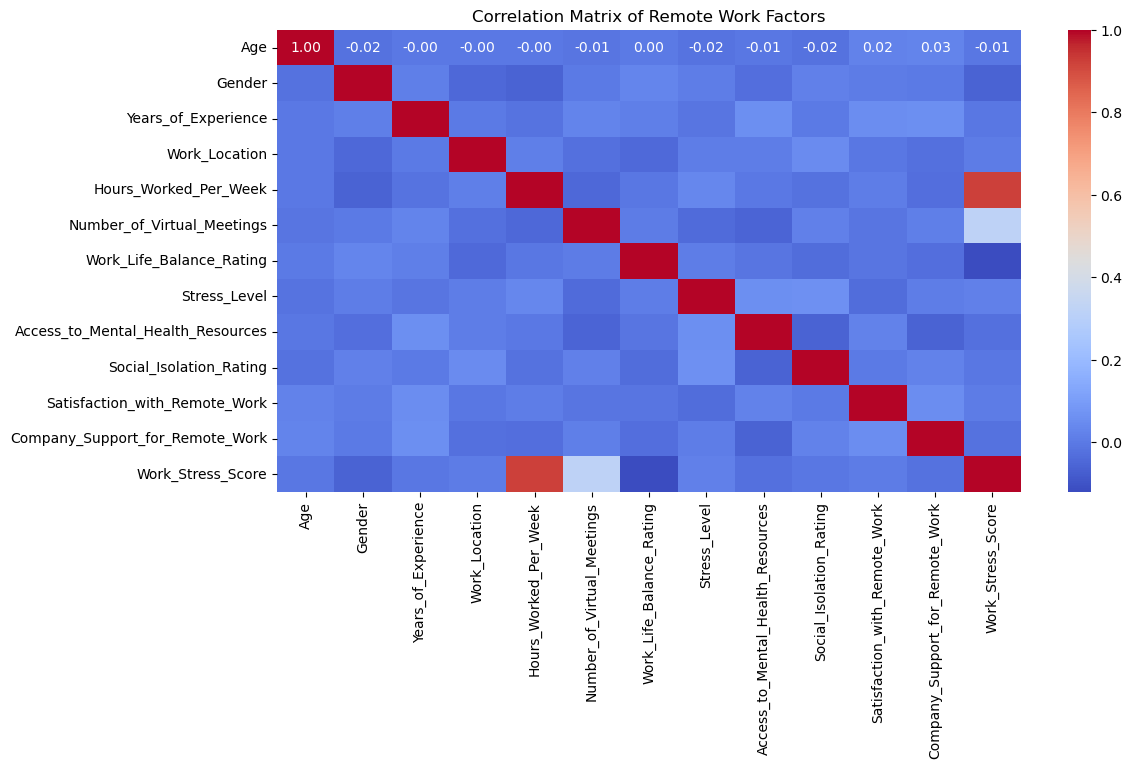

In [79]:
# Saving correlation matrix to file
correlation_matrix.to_csv("../Secondary_Research/results/correlation_matrix.csv")

# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Remote Work Factors")
plt.savefig("../IMG/correlation_matrix.png")
plt.show()

### 2.1.2 Interpretation of the above:
- Stress_Level appears to have a strong positive correlation with Hours_Worked_Per_Week meaning employees who work longer hours tend to report higher stress.
- Access_to_Mental_Health_Resources has a negative correlation with Stress_Level meaning that access to resources might reduce stress.
- Work_Life_Balance_Rating is negatively correlated with Social_Isolation_Rating which means better balance is linked to less isolation.

### 2.2 Defining independent variables (features) for RM

In [92]:
# Defining independent variables (features)
X = wfh_mentalHealth_data[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Access_to_Mental_Health_Resources', 'Company_Support_for_Remote_Work']]
X = sm.add_constant(X)  # Adding constant for intercept

### 2.2.1 Building OLS Regression Model

In [128]:
# Defining dependent variable (target)
y = wfh_mentalHealth_data['Stress_Level']

# Building OLS Regression model
rg_model = sm.OLS(y, X).fit()

# Displaying results
print(rg_model.summary())

# Saving regression summary to file
with open("../Secondary_Research/results/regression_summary.txt", "w") as f:
    f.write(rg_model.summary().as_text())

                                 OLS Regression Results                                
Dep. Variable:           Stress_Level   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              1127.
Date:                Sat, 28 Jun 2025   Prob (F-statistic):                        0.00
Time:                        18:35:23   Log-Likelihood:                         -1658.0
No. Observations:                1305   AIC:                                      3328.
Df Residuals:                    1299   BIC:                                      3359.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [106]:
print(wfh_mentalHealth_data.columns)

Index(['Employee_ID', 'Age', 'Gender', 'Years_of_Experience', 'Work_Location',
       'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Work_Life_Balance_Rating', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'MHC_Burnout', 'MHC_Depression', 'Job_Role_Designer', 'Job_Role_HR',
       'Job_Role_Marketing', 'Job_Role_Project Manager', 'Job_Role_Sales',
       'Job_Role_Software Engineer', 'Industry_Education', 'Industry_Finance',
       'Industry_Healthcare', 'Industry_IT', 'Industry_Manufacturing',
       'Industry_Retail', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America',
       'Work_Stress_Score'],
      dtype='object')


### 2.2.2 Building Binary Logistical Regression Model

In [109]:
# Creating and converting stress_level into binary
wfh_mentalHealth_data['stress_binary'] = wfh_mentalHealth_data['Stress_Level'].apply(lambda x: 1 if x >= 3 else 0)

In [111]:
# Defining independent variables (features)
features = [
    'Age',
    'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings',
    'Work_Life_Balance_Rating',
    'Access_to_Mental_Health_Resources',
    'Company_Support_for_Remote_Work',
]

In [113]:
X = wfh_mentalHealth_data[features] # feature sample to test
# X = sm.add_constant(X)  # Adding constant for intercept
y = wfh_mentalHealth_data['stress_binary'] # Target (binary): stress_level (0 = low/medium, 1 = high)

In [115]:
lg_model = sm.Logit(y, X).fit() # fitting samples and target variable to Binary Logistic Model

# Printing Summary
print(lg_model.summary()) 

Optimization terminated successfully.
         Current function value: 0.628324
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          stress_binary   No. Observations:                 1305
Model:                          Logit   Df Residuals:                     1299
Method:                           MLE   Df Model:                            5
Date:                Sat, 28 Jun 2025   Pseudo R-squ.:              -0.0001209
Time:                        18:32:19   Log-Likelihood:                -819.96
converged:                       True   LL-Null:                       -819.86
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0109      0.004     -2

### 2.2.3 Building Decision Tree & Random Forest Classifier

In [119]:
# Retrieving features to test
X = wfh_mentalHealth_data[features] # feature sample to test
# X = sm.add_constant(X)  # Adding constant for intercept
y = wfh_mentalHealth_data['stress_binary'] # Target (binary): stress_level (0 = low/medium, 1 = high)

In [122]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))


# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       262
           1       0.37      0.36      0.37       130

    accuracy                           0.59       392
   macro avg       0.53      0.53      0.53       392
weighted avg       0.58      0.59      0.59       392

Accuracy: 0.5867346938775511

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       262
           1       0.30      0.10      0.15       130

    accuracy                           0.62       392
   macro avg       0.48      0.49      0.45       392
weighted avg       0.54      0.62      0.56       392

Accuracy: 0.625


### 2.2.4 Creating Summary Table For Model Comparisons

In [134]:
# Manually input your model names and their performance scores
model_comparison = pd.DataFrame({
    'Model': [
        'OLS Regression',
        'Binary Logistic Regression',
        'Decision Tree',
        'Random Forest'
    ],
    'Score_Type': [
        'R-squared',
        'Pseudo R-squared',
        'Accuracy',
        'Accuracy'
    ],
    'Score_Value': [
        0.006,       # From OLS model
        0.0001,      # From Binary Logistic Regression
        0.586,        # Replace with actual Decision Tree accuracy
        0.625         # Replace with actual Random Forest accuracy
    ]
})

# Displaying table
print(model_comparison)
model_comparison

                        Model        Score_Type  Score_Value
0              OLS Regression         R-squared       0.0060
1  Binary Logistic Regression  Pseudo R-squared       0.0001
2               Decision Tree          Accuracy       0.5860
3               Random Forest          Accuracy       0.6250


,Model,Score_Type,Score_Value
0,OLS Regression,R-squared,0.0060
1,Binary Logistic Regression,Pseudo R-squared,0.0001
2,Decision Tree,Accuracy,0.5860
3,Random Forest,Accuracy,0.6250


### 2.2.5 Bar Chart Visualization

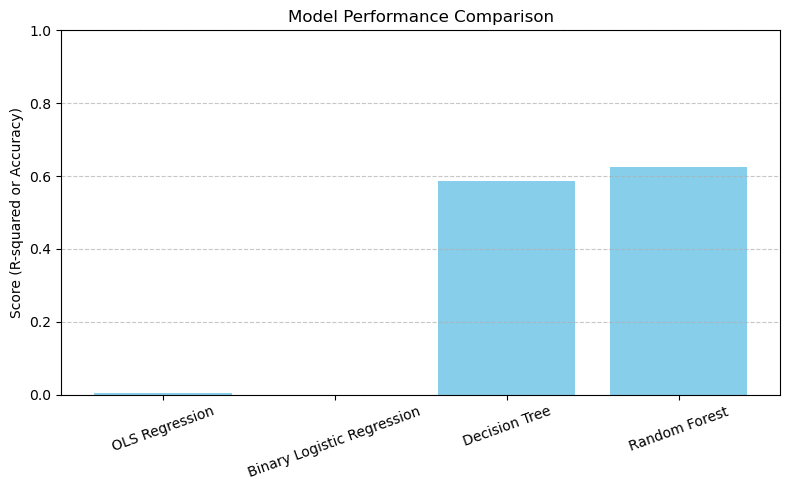

In [132]:
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(model_comparison['Model'], model_comparison['Score_Value'], color='skyblue')
plt.title('Model Performance Comparison')
plt.ylabel('Score (R-squared or Accuracy)')
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("../IMG/model_performance_comparison.png")
plt.tight_layout()
plt.show()